# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


<ul>
    In this report I seek to explore a data set which contains information of about 10,000 movies from 1960 to 2015 collected from The Movie Database (TMDb), including user ratings and revenue. Questions to be answered include:
<li>Which genres are most popular from year to year?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
<li>Which directors (top 10 directors) made the most high-revenue movies?</li>
<li>Which genres are the most expensive to make?</li>
  

</ul>


In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('movies_data.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning 

In [6]:
# Check for duplicates, drop them and confirm correction by rechecking for duplicates in the data
sum(df.duplicated())
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [7]:
# columns to be dropped completely as I'm assuming that they won't be useful in the data analysis process
d = ['id', 'imdb_id', 'homepage','tagline', 'overview', 'keywords']
df.drop(columns=d, inplace=True)
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9931 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9931 non-null   float64
 1   budget                9931 non-null   int64  
 2   revenue               9931 non-null   int64  
 3   original_title        9931 non-null   object 
 4   cast                  9892 non-null   object 
 5   director              9910 non-null   object 
 6   runtime               9931 non-null   int64  
 7   genres                9922 non-null   object 
 8   production_companies  9835 non-null   object 
 9   release_date          9931 non-null   object 
 10  vote_count            9931 non-null   int64  
 11  vote_average          9931 non-null   float64
 12  release_year          9931 non-null   int64  
 13  budget_adj            9931 non-null   float64
 14  revenue_adj           9931 non-null   float64
dtypes: float64(4), int64

In [10]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9931.000000,9.931000e+03,9.931000e+03,9931.000000,9931.000000,9931.000000,9931.000000,9.931000e+03,9.931000e+03
mean,0.687269,1.595098e+07,4.357257e+07,102.637096,235.931125,5.969087,2000.948142,1.914157e+07,5.620020e+07
std,1.030440,3.200683e+07,1.217188e+08,28.148316,598.758989,0.915256,12.996879,3.545161e+07,1.503876e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.229121,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.413991,1.000000e+05,0.000000e+00,99.000000,45.000000,6.000000,2005.000000,1.519180e+05,0.000000e+00
75%,0.767167,1.900000e+07,3.004471e+07,112.000000,169.000000,6.600000,2011.000000,2.423495e+07,4.178619e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


 <ul>
    A significant number of data in the production_companies column have null values
 but dropping all of them might impact the result of the data analysis process especially if such rows have significant revenue values so instead let's drop only rows with null values in production_companies column and a revenue value of 0. I'm assuming that rows with revenue values of 0 are insignificant
 </ul>

In [11]:
# creating a new dataframe that meets the requirement
df = df.query('not(production_companies.isna() & revenue_adj==0)')


<a id='eda'></a>
## Exploratory Data Analysis

### Q1.  Which genres are most popular from year to year?
<ul>
    This can be explored by using the groupby function to classify the data by years and genres

</ul>

In [12]:
df.groupby(['release_year', 'genres']).mean()['popularity']

release_year  genres                                
1960          Action|Adventure|Drama|History|Western    0.310398
              Action|Adventure|Western                  1.872132
              Action|Drama|Foreign|History|War          0.194948
              Action|Drama|History                      1.136943
              Action|Drama|History|War                  0.256779
                                                          ...   
2015          War|Action                                0.356519
              War|Adventure|Science Fiction             5.476958
              War|Drama                                 0.561032
              Western|Drama                             0.747541
              Western|Drama|Adventure|Thriller          9.110700
Name: popularity, Length: 5742, dtype: float64

<ul>
   So we have a problem where a movie usually has multiple genres. I will separate each individual genres to have their own separate rows which would allow me to determine their popularity individually. 
<li>first, I create a new copy of the dataframe</li>
<li>Then I'll use the pandas split function to turn the pipe separated values in the genre column to a list</li>
<li>After which I'll use the pandas explode function to separare each genre into a new row </li>
<li>Finally I would use the groupby function to classify data by year and genres, find the mean popularity values and sort the data</li>
  

</ul>

In [14]:
# create a new copy of the dataframe
df_copy = df.copy()

In [15]:
# Using the pandas split function on the genres column
df_copy['genres'] = df_copy['genres'].str.split('|', expand = False)

In [16]:
df_copy = df_copy.explode('genres')
df_copy.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [17]:
pop_genres = df_copy.groupby(['release_year', 'genres']).mean().sort_values(by=['release_year','popularity'], ascending=False)['popularity']
pop_genres

release_year  genres         
2015          Adventure          3.371057
              Western            3.178796
              Action             2.332647
              Science Fiction    2.321390
              Crime              1.845816
                                   ...   
1960          Crime              0.346480
              Science Fiction    0.327905
              Family             0.278064
              War                0.225863
              Foreign            0.194948
Name: popularity, Length: 1046, dtype: float64

In [18]:
# Sampling the year 1960
pop_genres.loc[[1960]]

release_year  genres         
1960          Thriller           0.811910
              Adventure          0.700981
              Horror             0.591450
              Action             0.590724
              Western            0.567759
              Drama              0.566305
              Romance            0.541227
              Fantasy            0.428247
              Music              0.423531
              History            0.412364
              Comedy             0.396000
              Crime              0.346480
              Science Fiction    0.327905
              Family             0.278064
              War                0.225863
              Foreign            0.194948
Name: popularity, dtype: float64

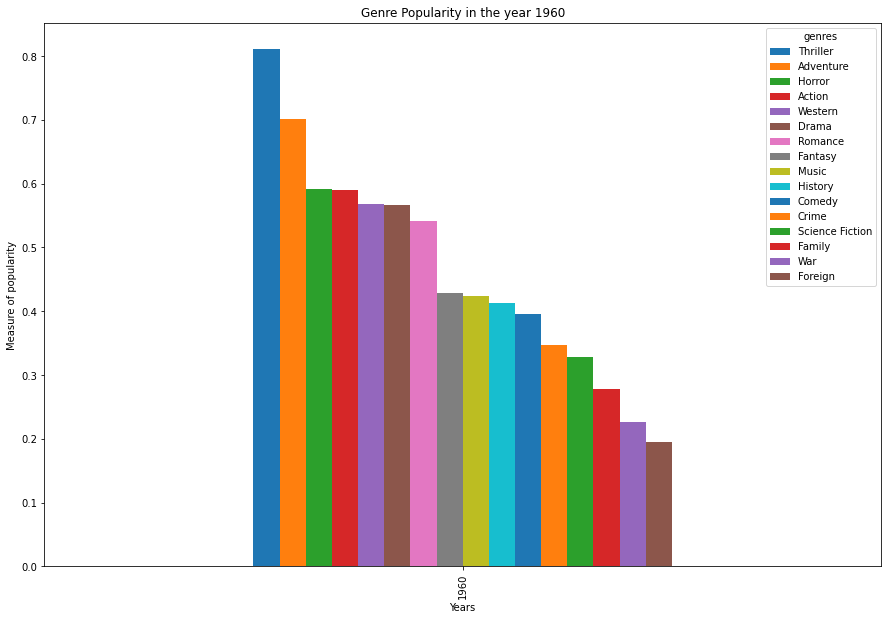

In [19]:
# For the year 1960 here is visualisation of genre popularity

pop_genres.loc[[1960]].unstack().plot(kind='bar', figsize=(15,10));
plt.xlabel('Years')
plt.ylabel('Measure of popularity')
plt.title('Genre Popularity in the year 1960');

In 1960 the most popular genre is Thriller and the least popular is Foreign

In [20]:
# Sampling the year 2015
pop_genres.loc[[2015]].sort_values(ascending=False)

release_year  genres         
2015          Adventure          3.371057
              Western            3.178796
              Action             2.332647
              Science Fiction    2.321390
              Crime              1.845816
              Fantasy            1.790357
              Thriller           1.486609
              Family             1.447722
              War                1.438548
              Mystery            1.294805
              Animation          1.175221
              History            1.136360
              Romance            1.116270
              Drama              1.022949
              Comedy             1.022340
              Music              0.660579
              Horror             0.503531
              TV Movie           0.280440
              Documentary        0.214784
Name: popularity, dtype: float64

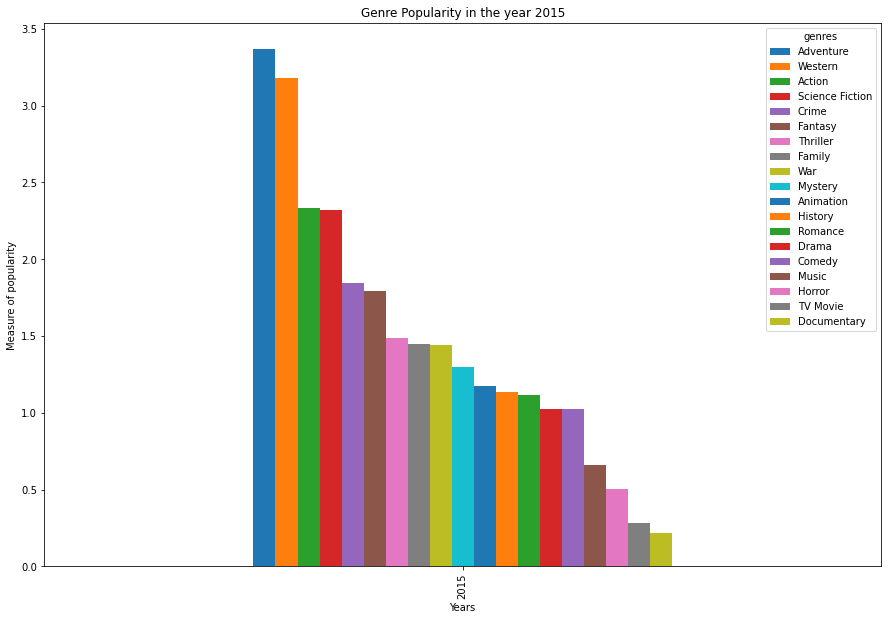

In [21]:
# For the year 2015 here is visualisation of genre popularity

pop_genres.loc[[2015]].sort_values(ascending=False).unstack().plot(kind='bar', figsize=(15,10));
plt.xlabel('Years')
plt.ylabel('Measure of popularity')
plt.title('Genre Popularity in the year 2015');

In 2015 the most popular genre is Adventure and the least popular is Documentary

### Q2.  What kinds of properties are associated with movies that have high revenues?

In [25]:
df['revenue_adj'].describe()

count    9.931000e+03
mean     5.620020e+07
std      1.503876e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.178619e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [26]:
# sort out movies with revenues equal to or above the mean revenue
m = df['revenue_adj'].mean()
df_high = df.query('revenue_adj >= @m')
df_high.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [27]:
df_high.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2182.000000,2.182000e+03,2.182000e+03,2182.000000,2182.000000,2182.000000,2182.000000,2.182000e+03,2.182000e+03
mean,1.587083,5.022552e+07,1.814464e+08,113.223648,792.623740,6.314207,1999.277269,5.944008e+07,2.345420e+08
std,1.790696,4.933793e+07,2.066301e+08,24.233001,1063.672837,0.732641,12.476319,5.081967e+07,2.482434e+08
min,0.010335,0.000000e+00,8.000000e+06,44.000000,10.000000,3.400000,1960.000000,0.000000e+00,5.621080e+07
25%,0.683174,1.500000e+07,6.571789e+07,98.000000,171.000000,5.800000,1992.000000,2.302728e+07,8.830833e+07
50%,1.119073,3.500000e+07,1.123638e+08,110.000000,395.000000,6.300000,2002.000000,4.605455e+07,1.479431e+08
75%,1.858811,7.000000e+07,2.127569e+08,124.000000,955.000000,6.800000,2009.000000,8.330877e+07,2.753691e+08
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


Movies with high revenues have a mean budget of 46 million


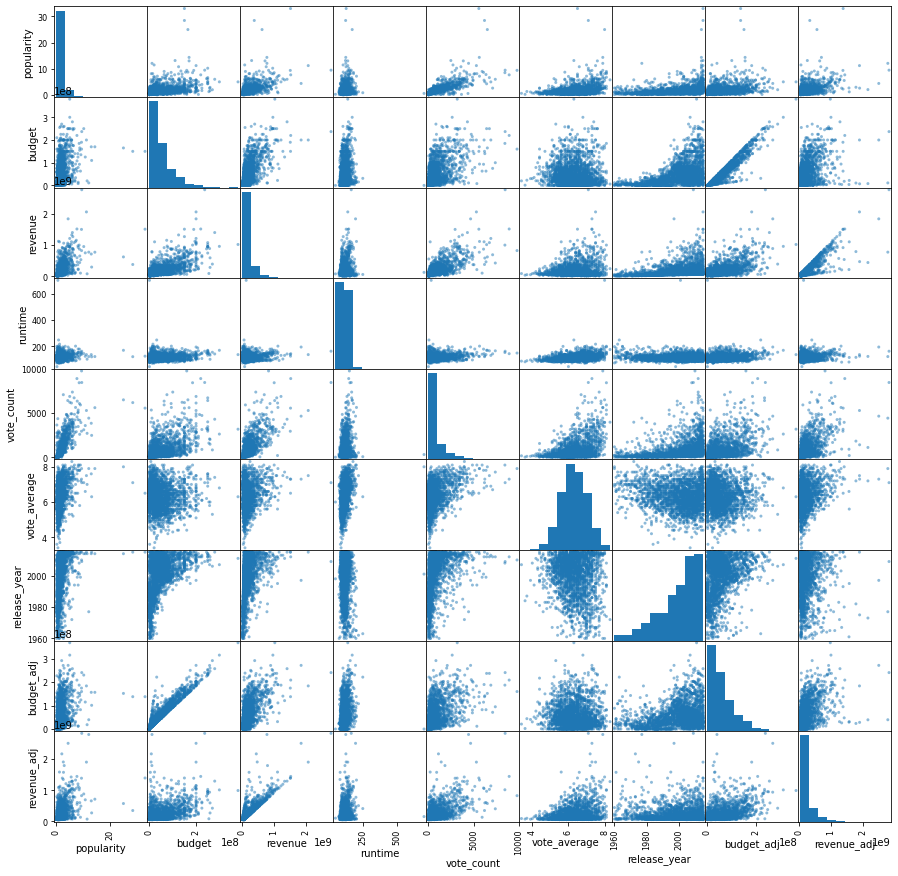

In [28]:
pd.plotting.scatter_matrix(df_high, figsize = (15,15));

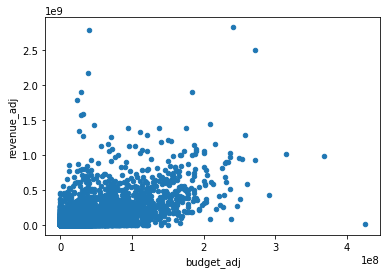

In [29]:
df.plot(x='budget_adj', y= 'revenue_adj', kind = 'scatter');

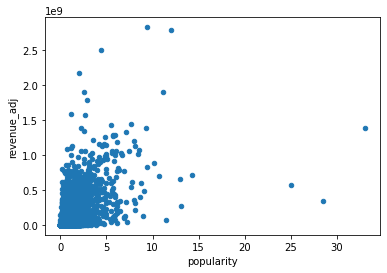

In [30]:
df.plot(x='popularity', y= 'revenue_adj', kind = 'scatter');

Existence of  a correlation between revenue and budget is inconclusive. But there seems to be a positive correlation between revenue and popularity after drawing the line of best fit 

### Q3.   Which directors (top 10 directors) made the most high-revenue movies?

In [31]:
df['director'].str.contains('|').all()

True

We need to split the rows with more than one director into multiple rows

In [32]:
# make a copy of the dataframe
df_2 = df.copy()

In [33]:
# use the split function on the director column
df_2['director'] = df_2['director'].str.split('|', expand=False)

In [34]:
# use the explode function to explode rows
df_2 = df_2.explode('director')

In [46]:
top_d = df_2.groupby('director')['revenue_adj'].count().sort_values(ascending=False).iloc[:10]
top_d

director
Woody Allen          43
Clint Eastwood       34
Steven Spielberg     30
Martin Scorsese      28
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: revenue_adj, dtype: int64

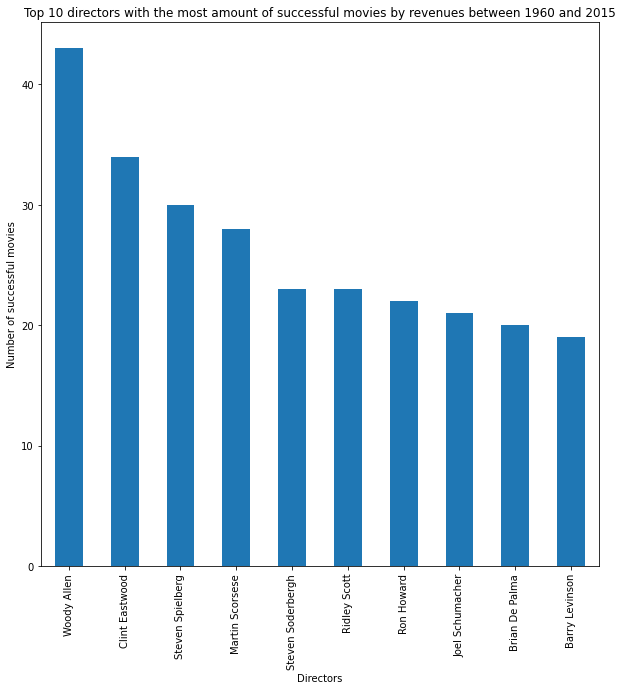

In [36]:
# create a bar chart

top_d.plot(kind='bar', figsize=(10,10))
plt.xlabel('Directors')
plt.ylabel('Number of successful movies')
plt.title('Top 10 directors with the most amount of successful movies by revenues between 1960 and 2015');

We could also look at the total revenues from movies as a measure of top directors 

In [48]:
top_d2 = df_2.groupby('director').sum()['revenue_adj'].sort_values(ascending=False).iloc[:10]
top_d2

director
Steven Spielberg    1.526692e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
Michael Bay         5.460672e+09
Chris Columbus      5.094077e+09
Tim Burton          4.660141e+09
Ron Howard          4.527095e+09
Ridley Scott        4.219566e+09
Name: revenue_adj, dtype: float64

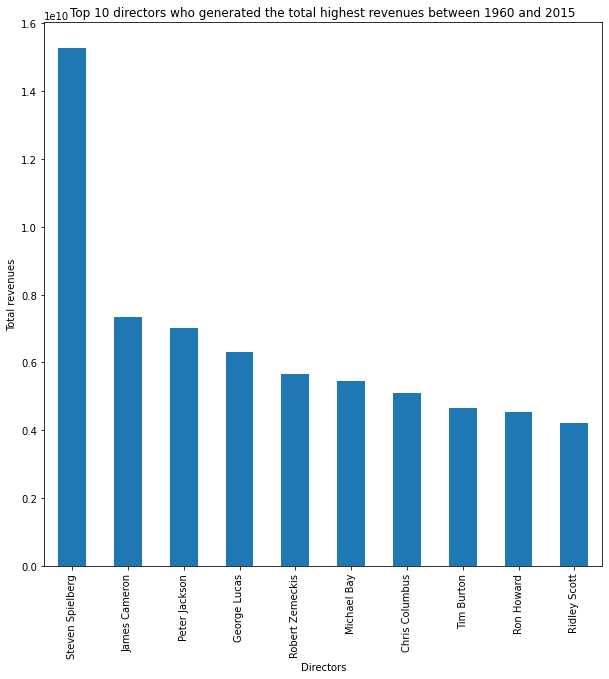

In [38]:
# create a bar chart
top_d2.plot(kind='bar', figsize=(10,10))
plt.xlabel('Directors')
plt.ylabel('Total revenues')
plt.title('Top 10 directors who generated the total highest revenues between 1960 and 2015');

We can also look at this in terms of proportion

In [50]:
top_d3 = df_2.groupby('director').mean()['revenue_adj'].sort_values(ascending=False).iloc[:10]
top_d3

director
Hamilton Luske      1.574815e+09
Clyde Geronimi      1.574815e+09
George Lucas        1.052320e+09
David Yates         1.044364e+09
Lee Unkrich         8.540177e+08
Pierre Coffin       8.387905e+08
Bob Peterson        7.433371e+08
James Cameron       7.327221e+08
Conrad Vernon       7.196849e+08
Robert Stromberg    6.985650e+08
Name: revenue_adj, dtype: float64

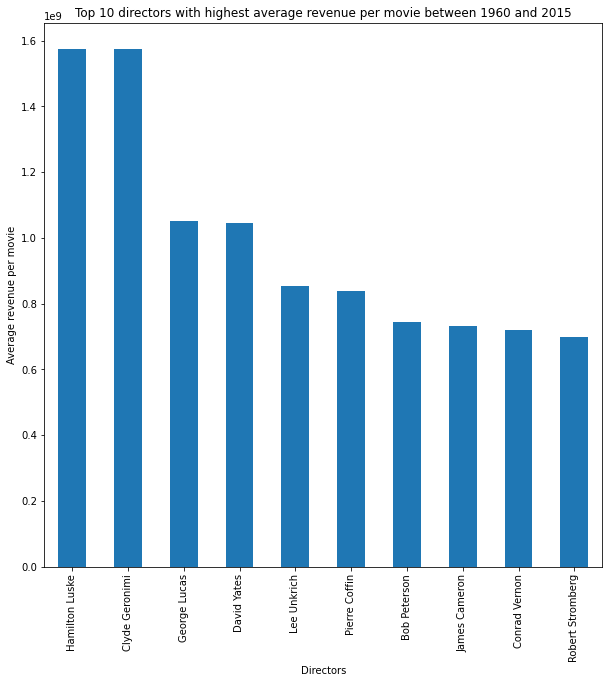

In [40]:
# create a bar chart
top_d3.plot(kind='bar', figsize=(10,10))
plt.xlabel('Directors')
plt.ylabel('Average revenue per movie')
plt.title('Top 10 directors with highest average revenue per movie between 1960 and 2015');

### Q4.  Which genres are the most expensive to make?

In [41]:
# Note I'm using the datframe where the genres have been split and exploded to have their individual rows for this analysis
df_copy.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [42]:
# Using the groupby function to explore the genres relative to their budget(budget_adj)
exp_genres = df_copy.groupby('genres').mean()['budget_adj'].sort_values(ascending=False)
exp_genres

genres
Adventure          4.608853e+07
Fantasy            4.044130e+07
Action             3.478190e+07
Science Fiction    3.168744e+07
War                2.981061e+07
Family             2.954485e+07
History            2.824778e+07
Animation          2.745567e+07
Western            2.526298e+07
Crime              2.231969e+07
Thriller           2.165590e+07
Mystery            2.030458e+07
Comedy             1.731879e+07
Romance            1.681572e+07
Drama              1.595396e+07
Music              1.510495e+07
Horror             8.250994e+06
Foreign            3.356076e+06
Documentary        8.815935e+05
TV Movie           3.661896e+05
Name: budget_adj, dtype: float64

Adventure movies are the most expensive to make while TV movie are the least expensive to make

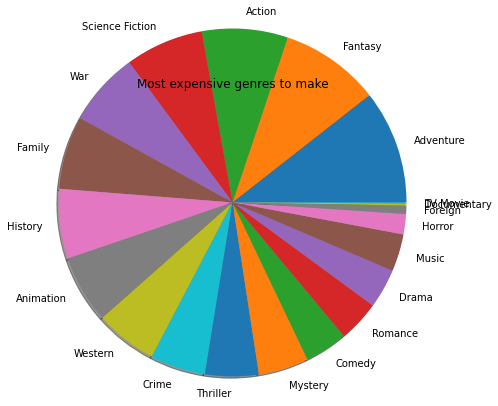

In [43]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = exp_genres.index
sizes = exp_genres.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, radius=2, shadow=True)
plt.title('Most expensive genres to make')

plt.show();

<a id='conclusions'></a>
## Conclusions


<ul>1. 
    In 1960 the most popular genre is Thriller and the least popular is Foreign
In 2015 the most popular genre is Adventure and the least popular is Documentary
</ul>


<ul>2.
    Movies with high revenues have a mean budget of 46 million.
Existence of  a correlation between revenue and budget is inconclusive. But there seems to be a positive correlation between revenue and popularity after drawing the line of best fit.
</ul>

<ul>3.
    I used 3 metrics to look at the top directors.
    
   <li>Top 10 directors with the most amount of successful movies by revenues between 1960 and 2015 in descending order are 'Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Martin Scorsese', 'Steven Soderbergh', 'Ridley Scott', 'Ron Howard', 'Joel Schumacher', 'Brian De Palma', 'Barry Levinson'
   </li>
   <li>Top 10 directors who generated the total highest revenues between 1960 and 2015 in descending order are 'Steven Spielberg', 'James Cameron', 'Peter Jackson', 'George Lucas', 'Robert Zemeckis', 'Michael Bay', 'Chris Columbus', 'Tim Burton', 'Ron Howard', 'Ridley Scott' 
   </li>
   <li>Top 10 directors with highest average revenue per movie between 1960 and 2015
'Hamilton Luske', 'Clyde Geronimi', 'George Lucas', 'David Yates', 'Lee Unkrich', 'Pierre Coffin', 'Bob Peterson', 'James Cameron', 'Conrad Vernon', 'Robert Stromberg'
   </li>
</ul>

<ul></ul>